## Sampling and the Central Limit Theorem

In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

In [2]:
%%html
<style>
    table {display: inline-block}
</style>

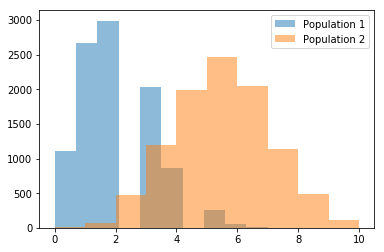

In [3]:
# Create two populations from which to sample
# n = The number of trials
# p = P(success)
# N = number (size) of successes

pop1 = np.random.binomial(n=10, p=0.2, size=10000)
pop2 = np.random.binomial(n=10, p=0.5, size=10000)

# Take a look at how the population might overlap
plt.hist(pop1, alpha=0.5, label='Population 1')
plt.hist(pop2, alpha=0.5, label='Population 2')
plt.legend(loc='upper right')
plt.show()
# These populations are not normal, bring in the Central Limit Theorem

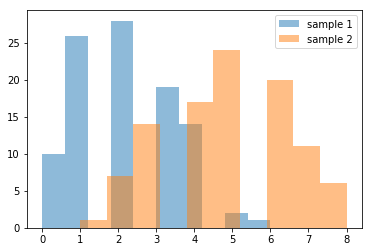

In [4]:
# a: for our purposes a is the population
# size: the sample size
# replace: Wether the sample is with or without replacement
# p: The probabilities associated with each entry in a.  If none the sample assumes a uniform distribution over all entries in a.
sample1 = np.random.choice(a=pop1, size=100, replace=True, p=None)
sample2 = np.random.choice(a=pop2, size=100, replace=True, p=None)

plt.hist(sample1, alpha=0.5, label='sample 1')
plt.hist(sample2, alpha=0.5, label='sample 2')
plt.legend(loc='upper right')
plt.show()

In [5]:
# Now, compute the mean and StDev for each sample
print(f'sample1 Mean: {sample1.mean():.4f}')
print(f'sample2 StDev: {sample2.mean():.4f}')
print(f'sample1 Mean: {sample1.std():.4f}')
print(f'sample2 StDev: {sample2.std():.4f}')

# Compute the difference between the two sample means.
diff=sample2.mean() - sample1.mean()
print(f'sample1-sample2 Diff: {diff:.4f}')

sample1 Mean: 2.1100
sample2 StDev: 4.9000
sample1 Mean: 1.3183
sample2 StDev: 1.6401
sample1-sample2 Diff: 2.7900


In [6]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then take the square root of the sum
diff_se = (sum(sd**2/size))**0.5

# The difference between the means divided by the standard error: T-value.
print(f'T-value: {diff/diff_se:.4f}')

T-value: 13.2588


In [9]:
from scipy.stats import ttest_ind
_, pval_ = ttest_ind(sample2, sample1, equal_var=False)
print(f"T-value: {_} | P-value: {pval_}")

T-value: 48.26914617358302 | P-value: 0.0


### Assignments


<p>
<h2>Assignments 1, part 1</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \bar{x} $</td>
            <td>3.0330</td>
            <td>5.110000</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>2.0379</td>
            <td>2.4959</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>1.4276</td>
            <td>1.5798</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>0.0451</td>
            <td>0.0500</td>
        </tr>
    </table><br />
$ \bar{y}=2.0770 $, where $ \bar{y} = \bar{x_2}-\bar{x_1} $<br />
$ SE=0.0673 $<br />
$ t$-$value=30.8464 $<br />
$ p$-$value=0.0000 $
</p>
<p>
</p>


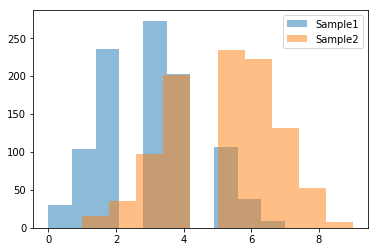

In [20]:
sample1 = np.random.choice(a=pop1, size=1000, replace=True, p=None)
sample2 = np.random.choice(a=pop2, size=1000, replace=True, p=None)

# Sample1 vitals
sample1_mean = np.mean(sample1)
sample1_variance = np.var(sample1)
sample1_stdev = np.std(sample1)
sample1_std_err = sample1_stdev/math.sqrt(len(sample1))

# Sample2 vitals
sample2_mean = np.mean(sample2)
sample2_variance = np.var(sample2)
sample2_stdev = np.std(sample2)
sample2_std_err = sample2_stdev/math.sqrt(len(sample2))

diff = sample2.mean()-sample1.mean()

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
# StdErr
diff_se = (sum(sd**2/size))**0.5
# T-value
t_val = diff/diff_se

# T-score and p-value checks
_, pvalue_ = ttest_ind(sample2, sample1, equal_var=False)

plt.hist(sample1, alpha=0.5, label='Sample1')
plt.hist(sample2, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')

md(f'''
<p>
<h2>Assignments 1, part 1</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \\bar{{x}} $</td>
            <td>{sample1_mean:.4f}</td>
            <td>{sample2_mean:4f}</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>{sample1_variance:.4f}</td>
            <td>{sample2_variance:.4f}</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>{sample1_stdev:.4f}</td>
            <td>{sample2_stdev:.4f}</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>{sample1_std_err:.4f}</td>
            <td>{sample2_std_err:.4f}</td>
        </tr>
    </table><br />
$ \\bar{{y}}={sample2_mean-sample1_mean:.4f} $, where $ \\bar{{y}} = \\bar{{x_2}}-\\bar{{x_1}} $<br />
$ SE={math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ t$-$value={(sample2_mean-sample1_mean)/math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ p$-$value={pvalue_:.4f} $
</p>
<p>
</p>
''')


<p>
<h2>Assignments 1, part 2</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \bar{x} $</td>
            <td>2.6000</td>
            <td>5.350000</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>1.2400</td>
            <td>2.3275</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>1.1136</td>
            <td>1.5256</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>0.2490</td>
            <td>0.3411</td>
        </tr>
    </table><br />
$ \bar{y}=2.7500 $, where $ \bar{y} = \bar{x_2}-\bar{x_1} $<br />
$ SE=0.4223 $<br />
$ t$-$value=6.5113 $<br />
$ p$-$value=0.0000 $
</p>
<p>
</p>


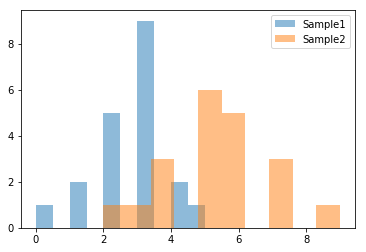

In [31]:
sample1 = np.random.choice(a=pop1, size=20, replace=True, p=None)
sample2 = np.random.choice(a=pop2, size=20, replace=True, p=None)

# Sample1 vitals
sample1_mean = np.mean(sample1)
sample1_variance = np.var(sample1)
sample1_stdev = np.std(sample1)
sample1_std_err = sample1_stdev/math.sqrt(len(sample1))

# Sample2 vitals
sample2_mean = np.mean(sample2)
sample2_variance = np.var(sample2)
sample2_stdev = np.std(sample2)
sample2_std_err = sample2_stdev/math.sqrt(len(sample2))

diff = sample2.mean()-sample1.mean()

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
# StdErr
diff_se = (sum(sd**2/size))**0.5
# T-value
t_val = diff/diff_se

# T-score and p-value checks
_, pvalue_ = ttest_ind(sample2, sample1, equal_var=False)

plt.hist(sample1, alpha=0.5, label='Sample1')
plt.hist(sample2, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')

md(f'''
<p>
<h2>Assignments 1, part 2</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \\bar{{x}} $</td>
            <td>{sample1_mean:.4f}</td>
            <td>{sample2_mean:4f}</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>{sample1_variance:.4f}</td>
            <td>{sample2_variance:.4f}</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>{sample1_stdev:.4f}</td>
            <td>{sample2_stdev:.4f}</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>{sample1_std_err:.4f}</td>
            <td>{sample2_std_err:.4f}</td>
        </tr>
    </table><br />
$ \\bar{{y}}={sample2_mean-sample1_mean:.4f} $, where $ \\bar{{y}} = \\bar{{x_2}}-\\bar{{x_1}} $<br />
$ SE={math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ t$-$value={(sample2_mean-sample1_mean)/math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ p$-$value={pvalue_:.4f} $
</p>
<p>
</p>
''')


<p>
<h2>Assignments 2, part 1</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \bar{x} $</td>
            <td>3.6500</td>
            <td>5.100000</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>2.5275</td>
            <td>1.3900</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>1.5898</td>
            <td>1.1790</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>0.3555</td>
            <td>0.2636</td>
        </tr>
    </table><br />
$ \bar{y}=1.4500 $, where $ \bar{y} = \bar{x_2}-\bar{x_1} $<br />
$ SE=0.4426 $<br />
$ t$-$value=3.2763 $<br />
$ p$-$value=0.0030 $
</p>
<p>
</p>


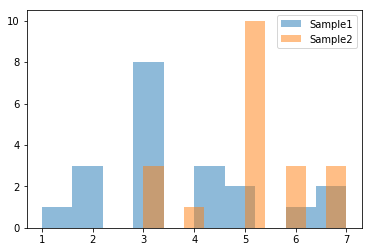

In [35]:
pop1 = np.random.binomial(n=10, p=0.3, size=10000)
pop2 = np.random.binomial(n=10, p=0.5, size=10000)

sample1 = np.random.choice(a=pop1, size=20, replace=True, p=None)
sample2 = np.random.choice(a=pop2, size=20, replace=True, p=None)

# Sample1 vitals
sample1_mean = np.mean(sample1)
sample1_variance = np.var(sample1)
sample1_stdev = np.std(sample1)
sample1_std_err = sample1_stdev/math.sqrt(len(sample1))

# Sample2 vitals
sample2_mean = np.mean(sample2)
sample2_variance = np.var(sample2)
sample2_stdev = np.std(sample2)
sample2_std_err = sample2_stdev/math.sqrt(len(sample2))

diff = sample2.mean()-sample1.mean()

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
# StdErr
diff_se = (sum(sd**2/size))**0.5
# T-value
t_val = diff/diff_se

# T-score and p-value checks
_, pvalue_ = ttest_ind(sample2, sample1, equal_var=False)

plt.hist(sample1, alpha=0.5, label='Sample1')
plt.hist(sample2, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')

md(f'''
<p>
<h2>Assignments 2, part 1</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \\bar{{x}} $</td>
            <td>{sample1_mean:.4f}</td>
            <td>{sample2_mean:4f}</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>{sample1_variance:.4f}</td>
            <td>{sample2_variance:.4f}</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>{sample1_stdev:.4f}</td>
            <td>{sample2_stdev:.4f}</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>{sample1_std_err:.4f}</td>
            <td>{sample2_std_err:.4f}</td>
        </tr>
    </table><br />
$ \\bar{{y}}={sample2_mean-sample1_mean:.4f} $, where $ \\bar{{y}} = \\bar{{x_2}}-\\bar{{x_1}} $<br />
$ SE={math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ t$-$value={(sample2_mean-sample1_mean)/math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ p$-$value={pvalue_:.4f} $
</p>
<p>
</p>
''')

<p>From part 1 to part 2, $ \bar{y} $ increased.  The $ SE $ increased as well.
$ T$-$value $ decreased while $ P$-$value $ remained the same</p>


<p>
<h2>Assignments 2, part 2</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \bar{x} $</td>
            <td>3.6000</td>
            <td>5.300000</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>1.9400</td>
            <td>2.5100</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>1.3928</td>
            <td>1.5843</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>0.3114</td>
            <td>0.3543</td>
        </tr>
    </table><br />
$ \bar{y}=1.7000 $, where $ \bar{y} = \bar{x_2}-\bar{x_1} $<br />
$ SE=0.4717 $<br />
$ t-value=3.6040 $<br />
$ p-value=0.0012 $
</p>
<p>
</p>


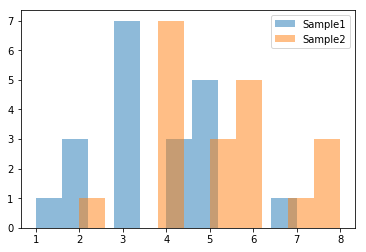

In [36]:
pop1 = np.random.binomial(n=10, p=0.4, size=10000)
pop2 = np.random.binomial(n=10, p=0.5, size=10000)

sample1 = np.random.choice(a=pop1, size=20, replace=True, p=None)
sample2 = np.random.choice(a=pop2, size=20, replace=True, p=None)

# Sample1 vitals
sample1_mean = np.mean(sample1)
sample1_variance = np.var(sample1)
sample1_stdev = np.std(sample1)
sample1_std_err = sample1_stdev/math.sqrt(len(sample1))

# Sample2 vitals
sample2_mean = np.mean(sample2)
sample2_variance = np.var(sample2)
sample2_stdev = np.std(sample2)
sample2_std_err = sample2_stdev/math.sqrt(len(sample2))

diff = sample2.mean()-sample1.mean()

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
# StdErr
diff_se = (sum(sd**2/size))**0.5
# T-value
t_val = diff/diff_se

# T-score and p-value checks
_, pvalue_ = ttest_ind(sample2, sample1, equal_var=False)

plt.hist(sample1, alpha=0.5, label='Sample1')
plt.hist(sample2, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')

md(f'''
<p>
<h2>Assignments 2, part 2</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \\bar{{x}} $</td>
            <td>{sample1_mean:.4f}</td>
            <td>{sample2_mean:4f}</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>{sample1_variance:.4f}</td>
            <td>{sample2_variance:.4f}</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>{sample1_stdev:.4f}</td>
            <td>{sample2_stdev:.4f}</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>{sample1_std_err:.4f}</td>
            <td>{sample2_std_err:.4f}</td>
        </tr>
    </table><br />
$ \\bar{{y}}={sample2_mean-sample1_mean:.4f} $, where $ \\bar{{y}} = \\bar{{x_2}}-\\bar{{x_1}} $<br />
$ SE={math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ t-value={(sample2_mean-sample1_mean)/math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ p-value={pvalue_:.4f} $
</p>
<p>
</p>
''')


<p>
<h2>Assignments 3</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \bar{x} $</td>
            <td>-0.2630</td>
            <td>-0.161457</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>0.5971</td>
            <td>0.4582</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>0.7727</td>
            <td>0.6769</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>0.1728</td>
            <td>0.1514</td>
        </tr>
    </table><br />
$ \bar{y}=0.1016 $, where $ \bar{y} = \bar{x_2}-\bar{x_1} $<br />
$ SE=0.2297 $<br />
$ t$-$value=0.4422 $<br />
$ p$-$value=0.6689 $
</p>
<p>
</p>


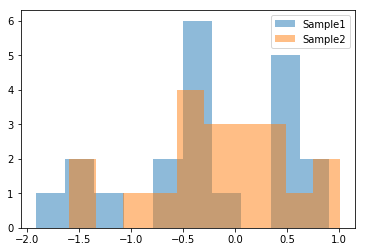

In [33]:
pop1 = np.random.normal(loc=0,scale=1,size=10000)
pop2 = np.random.normal(loc=0,scale=1,size=10000)

sample1 = np.random.choice(a=pop1, size=20, replace=True, p=None)
sample2 = np.random.choice(a=pop2, size=20, replace=True, p=None)

# Sample1 vitals
sample1_mean = np.mean(sample1)
sample1_variance = np.var(sample1)
sample1_stdev = np.std(sample1)
sample1_std_err = sample1_stdev/math.sqrt(len(sample1))

# Sample2 vitals
sample2_mean = np.mean(sample2)
sample2_variance = np.var(sample2)
sample2_stdev = np.std(sample2)
sample2_std_err = sample2_stdev/math.sqrt(len(sample2))

diff = sample2.mean()-sample1.mean()

size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])
# StdErr
diff_se = (sum(sd**2/size))**0.5
# T-value
t_val = diff/diff_se

# T-score and p-value checks
_, pvalue_ = ttest_ind(sample2, sample1, equal_var=False)

plt.hist(sample1, alpha=0.5, label='Sample1')
plt.hist(sample2, alpha=0.5, label='Sample2')
plt.legend(loc='upper right')

md(f'''
<p>
<h2>Assignments 3</h2>
    <table>
        <tr>
            <th></th>
            <th>$ Sample1 $</th>
            <th>$ Sample2 $</th>
        </tr>
        <tr>
            <td>Mean, $ \\bar{{x}} $</td>
            <td>{sample1_mean:.4f}</td>
            <td>{sample2_mean:4f}</td>
        </tr>
        <tr>
            <td>Variance, $ S^2 $</td>
            <td>{sample1_variance:.4f}</td>
            <td>{sample2_variance:.4f}</td>
        </tr>
        <tr>
            <td>StDev, $ S $</td>
            <td>{sample1_stdev:.4f}</td>
            <td>{sample2_stdev:.4f}</td>
        </tr>
        <tr>
            <td>StErr, $ SE $</td>
            <td>{sample1_std_err:.4f}</td>
            <td>{sample2_std_err:.4f}</td>
        </tr>
    </table><br />
$ \\bar{{y}}={sample2_mean-sample1_mean:.4f} $, where $ \\bar{{y}} = \\bar{{x_2}}-\\bar{{x_1}} $<br />
$ SE={math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ t$-$value={(sample2_mean-sample1_mean)/math.sqrt((sample1_std_err**2)+(sample2_std_err**2)):.4f} $<br />
$ p$-$value={pvalue_:.4f} $
</p>
<p>
</p>
''')